# Ensemble methods of Regression

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Uploading the dataset**

In [2]:
df = pd.read_csv('DS2_C5_S7_KCHouse_Data_Practice.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# null values

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
# no dulpicates

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
df['bathrooms'].astype('int64')


0        1
1        2
2        1
3        3
4        2
        ..
21608    2
21609    2
21610    0
21611    2
21612    0
Name: bathrooms, Length: 21613, dtype: int64

In [11]:
df['floors'].astype('int64')


0        1
1        2
2        1
3        1
4        1
        ..
21608    3
21609    2
21610    2
21611    2
21612    2
Name: floors, Length: 21613, dtype: int64

In [12]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [13]:
# change to category types

In [14]:
cat_col = ['bedrooms','grade','view','waterfront']
df[cat_col] = df[cat_col].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21613 non-null  int64   
 1   date           21613 non-null  object  
 2   price          21613 non-null  float64 
 3   bedrooms       21613 non-null  category
 4   bathrooms      21613 non-null  float64 
 5   sqft_living    21613 non-null  int64   
 6   sqft_lot       21613 non-null  int64   
 7   floors         21613 non-null  float64 
 8   waterfront     21613 non-null  category
 9   view           21613 non-null  category
 10  condition      21613 non-null  int64   
 11  grade          21613 non-null  category
 12  sqft_above     21613 non-null  int64   
 13  sqft_basement  21613 non-null  int64   
 14  yr_built       21613 non-null  int64   
 15  yr_renovated   21613 non-null  int64   
 16  zipcode        21613 non-null  int64   
 17  lat            21613 non-null  

In [16]:
# applying label erncoder

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [18]:
label_encoder =preprocessing.LabelEncoder()

for col in cat_col:
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,5,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,5,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,4,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,5,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,6,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
# dropping

In [21]:
df.drop(columns=['id','date','zipcode','sqft_living','lat','long','sqft_above','yr_renovated'],inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  sqft_living15  21613 non-null  int64  
 12  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.1 MB


In [23]:
df.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.369870,2.114757,1.510697e+04,1.494309,0.007542,0.234303,3.409430,5.656919,291.509045,1971.005136,1986.552492,12768.455652
std,3.671272e+05,0.909857,0.770163,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175216,442.575043,29.373411,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,5.000000,0.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,6.000000,560.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,12.000000,8.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,11.000000,4820.000000,2015.000000,6210.000000,871200.000000


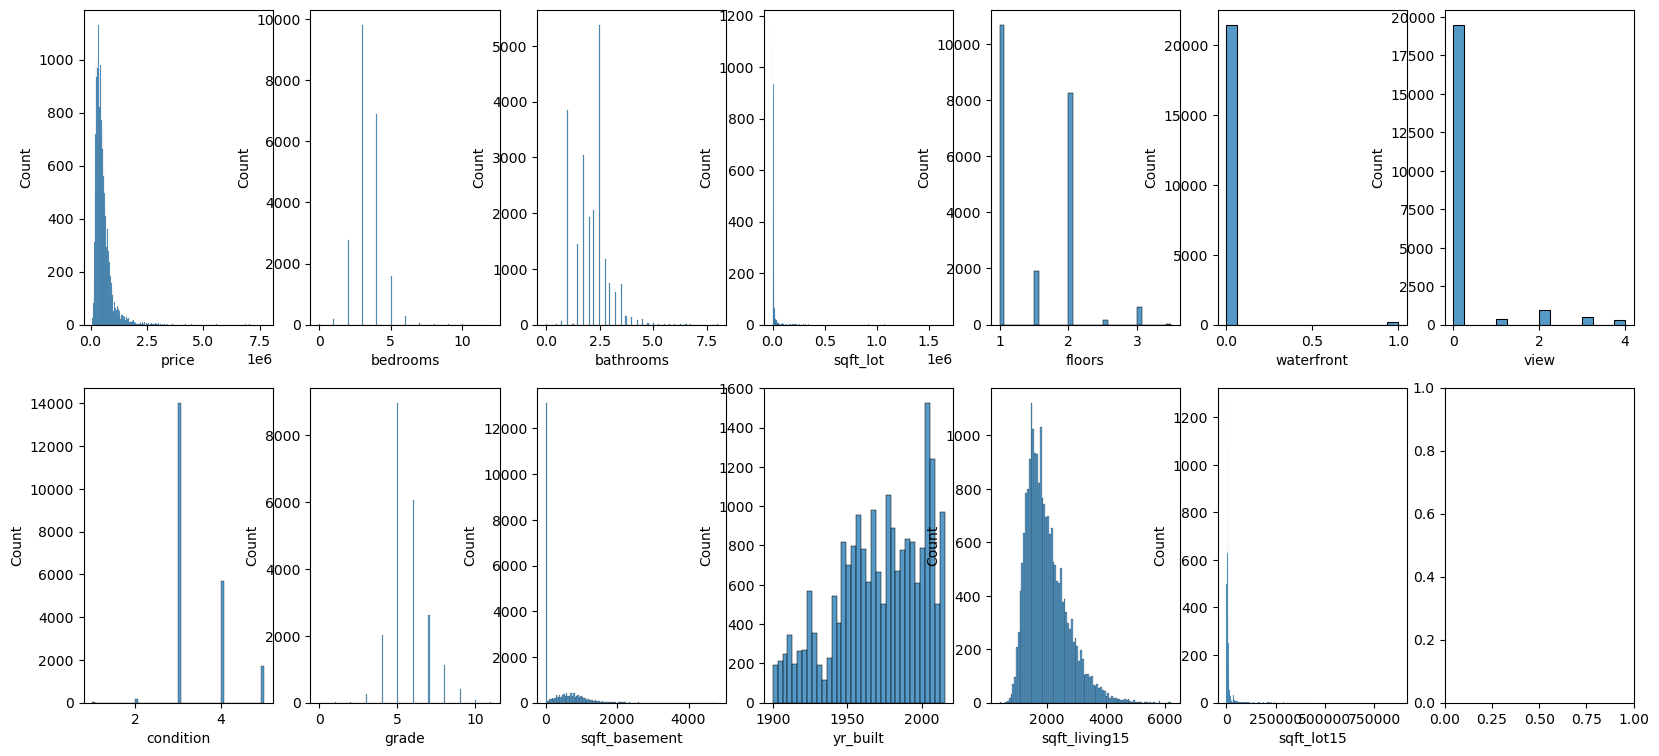

In [24]:
num_col = df.select_dtypes(["int64","float64"])

fig,axs=plt.subplots(2,7,figsize=(20,9))
axs=axs.ravel()

count=0
for i in num_col:
    sns.histplot(x=i,data=df,ax=axs[count])
    count+=1

<AxesSubplot:xlabel='bedrooms'>

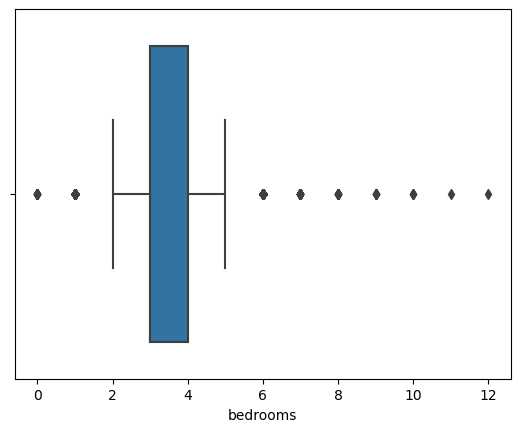

In [25]:
sns.boxplot('bedrooms',data=df)

In [26]:
iqr=df['bedrooms'].quantile(0.75)-df['bedrooms'].quantile(0.25)
lf=df['bedrooms'].quantile(0.25)-1.5*iqr
uf=df['bedrooms'].quantile(0.75)+1.5*iqr
df=df[(df['bedrooms']>lf) & (df['bedrooms']<uf)] 

<AxesSubplot:xlabel='bedrooms'>

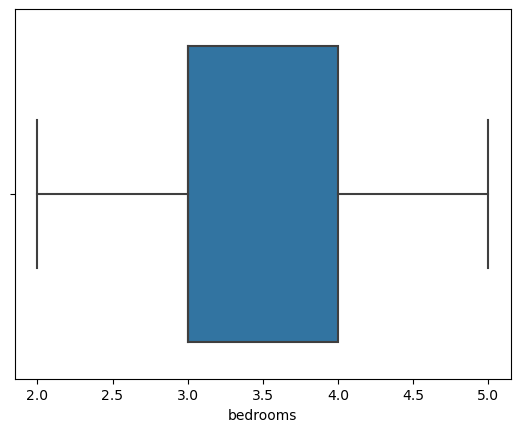

In [27]:
sns.boxplot('bedrooms',data=df)

<AxesSubplot:xlabel='bathrooms'>

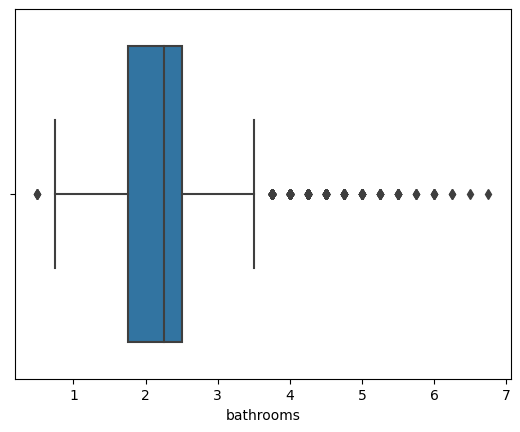

In [28]:
sns.boxplot('bathrooms',data=df)

In [29]:
iqr=df['bathrooms'].quantile(0.75)-df['bathrooms'].quantile(0.25)
lf=df['bathrooms'].quantile(0.25)-1.5*iqr
uf=df['bathrooms'].quantile(0.75)+1.5*iqr
df=df[(df['bathrooms']>lf) & (df['bathrooms']<uf)] 

<AxesSubplot:xlabel='bathrooms'>

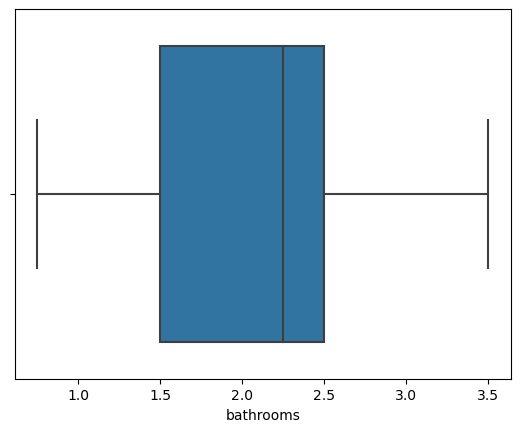

In [30]:
sns.boxplot('bathrooms',data=df)

<AxesSubplot:xlabel='sqft_living15'>

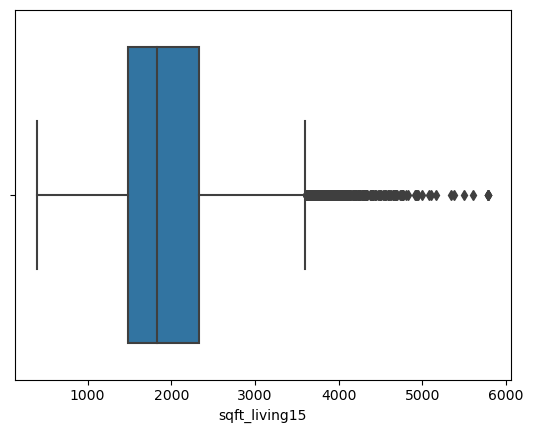

In [31]:
sns.boxplot('sqft_living15',data=df)

# Features eng

In [32]:
corr_mat = df.corr()

In [33]:
corr_mat

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.279899,0.443935,0.081236,0.241671,0.242390,0.380846,0.053257,0.653007,0.279145,0.027844,0.582647,0.072760
bedrooms,0.279899,1.000000,0.483637,0.026680,0.161393,-0.022181,0.058021,0.025146,0.342443,0.269177,0.168653,0.407580,0.026850
bathrooms,0.443935,0.483637,1.000000,0.062684,0.509312,0.036871,0.140643,-0.134433,0.632347,0.227665,0.544373,0.542975,0.063310
sqft_lot,0.081236,0.026680,0.062684,1.000000,-0.017847,0.023519,0.070138,-0.007889,0.097663,0.000982,0.044653,0.139511,0.697433
floors,0.241671,0.161393,0.509312,-0.017847,1.000000,0.016990,0.006364,-0.269714,0.447969,-0.284251,0.495995,0.262755,-0.026560
waterfront,0.242390,-0.022181,0.036871,0.023519,0.016990,1.000000,0.387007,0.015826,0.072622,0.066259,-0.030722,0.076311,0.036533
view,0.380846,0.058021,0.140643,0.070138,0.006364,0.387007,1.000000,0.047634,0.223406,0.256373,-0.067265,0.259817,0.070405
condition,0.053257,0.025146,-0.134433,-0.007889,-0.269714,0.015826,0.047634,1.000000,-0.153496,0.183516,-0.366201,-0.095212,-0.000622
grade,0.653007,0.342443,0.632347,0.097663,0.447969,0.072622,0.223406,-0.153496,1.000000,0.116201,0.449746,0.696044,0.105411
sqft_basement,0.279145,0.269177,0.227665,0.000982,-0.284251,0.066259,0.256373,0.183516,0.116201,1.000000,-0.155659,0.161366,0.001705


<AxesSubplot:>

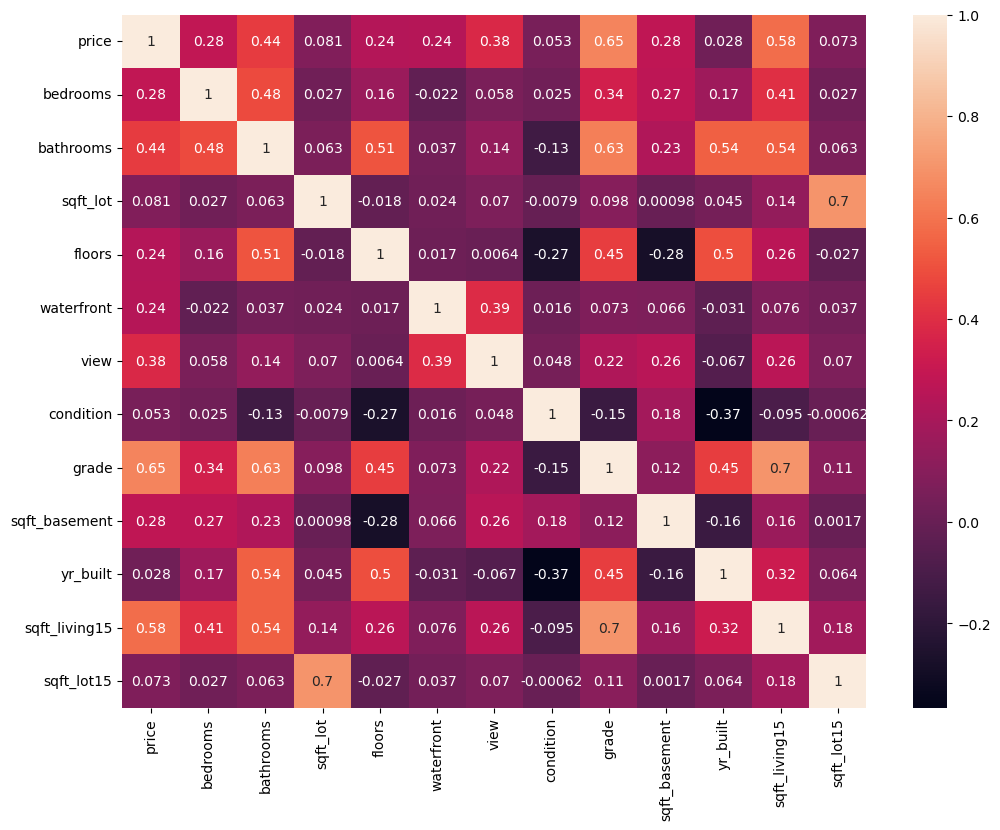

In [34]:
plt.figure(figsize=(12,9))
sns.heatmap(corr_mat,annot=True)

# Splitting and scaling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X=df.drop(['price'],axis=1)
y=df['price']

scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[-0.41253183, -1.56096262, -0.22445659, ..., -0.55023445,
        -0.95354716, -0.26645143],
       [-0.41253183,  0.27587299, -0.18453214, ..., -0.68755316,
        -0.4161316 , -0.18806604],
       [-1.67788328, -1.56096262, -0.11536655, ..., -1.30548735,
         1.16540563, -0.17139584],
       ...,
       [-1.67788328, -1.92832975, -0.33229271, ...,  1.30356811,
        -1.44489853, -0.41002006],
       [-0.41253183,  0.64324011, -0.30626157, ...,  1.13191973,
        -0.84606405, -0.43839487],
       [-1.67788328, -1.92832975, -0.33916413, ...,  1.26923843,
        -1.44489853, -0.43563621]])

In [37]:
X_train, X_test,y_train, y_test=train_test_split(scaled_X,y,test_size=0.3,random_state=42)

# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
# hyper tuning using kfold

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [41]:
kf=KFold(n_splits=5,shuffle=True)

In [42]:
for i in range(1,15):
    score=cross_val_score(LinearRegression(n_jobs=-1),scaled_X,y,cv=kf,scoring='r2')
    print(np.mean(score))

0.6129835385362191
0.61420292435712
0.6143051865934737
0.6138673292837922
0.6130973242994745
0.6133946955568174
0.6140161128444255
0.6149505370025954
0.6141772582010532
0.6139624540289675
0.6142998059929485
0.6121293059947094
0.6146202664716671
0.6144597774912285


In [43]:
lr_model=LinearRegression(n_jobs=-1)
for train_data, test_data in kf.split(df):
    train,test=df.iloc[train_data],df.iloc[test_data]
    X_train=train.drop(columns=['price'],axis=1)
    y_train=train['price']
    X_test=test.drop(columns=['price'])
    y_test=test['price']
    lr_model.fit(X_train,y_train)
    y_pred = lr_model.predict(X_test)
    print("rmse",mean_squared_error(y_test, y_pred, squared=False))
    print("r2:",r2_score(y_test,y_pred))
    print("Mae:", mean_absolute_error(y_test, y_pred))
    print()

rmse 192691.12122332578
r2: 0.5938905415488536
Mae: 126960.60062806147

rmse 183149.41882926476
r2: 0.6213110943667783
Mae: 126514.45882627317

rmse 184340.2339947096
r2: 0.6200479476053606
Mae: 125859.69553294315

rmse 190364.60163909197
r2: 0.6224163880315864
Mae: 130081.378986652

rmse 192282.500568909
r2: 0.6147292918747711
Mae: 128646.41135605755



In [44]:
print("rmse :", mean_squared_error(y_test,y_pred,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred))
print("mse :", mean_squared_error(y_test,y_pred))
print("r2q: " , r2_score(y_test,y_pred))

rmse : 192282.500568909
mae : 128646.41135605755
mse : 36972560025.032486
r2q:  0.6147292918747711


In [45]:
# lr_model.fit(X_test,y_test)
# pred = lr_model.predict(X_train)
# print("rmse",mean_squared_error(X_test, pred, squared=False))
# print("r2:",r2_score(X_test,pred))
# print("Mae:", mean_absolute_error(X_test, pred))
# print()

In [46]:
lr_model.score(X_train,y_train)

0.6154534229508333

In [47]:
lr_model.score(X_test,y_test)

0.6147292918747711

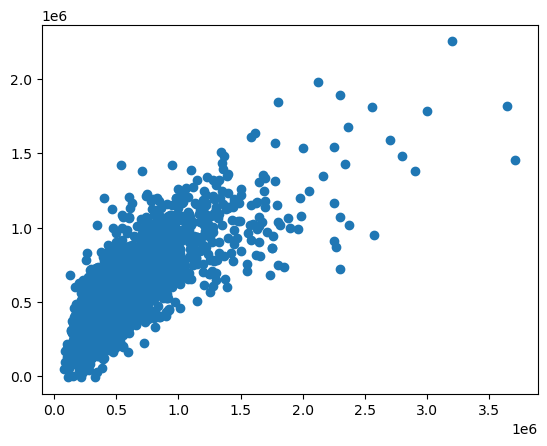

In [48]:
plt.scatter(y_test,y_pred)

<AxesSubplot:>

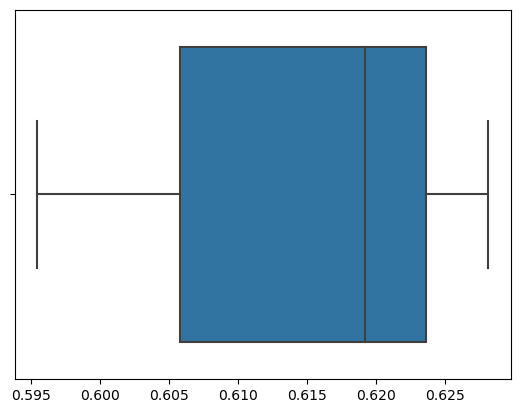

In [49]:
sns.boxplot(score)

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [51]:
for i in range(1,15):
    d_score=cross_val_score(DecisionTreeRegressor(max_depth=i,random_state=2),X,y,cv=kf,scoring='r2')
    print(np.mean(d_score))

0.31756641887680803
0.42035947932536527
0.5054006366314197
0.5707014206306165
0.6017630154168853
0.6150743860346236
0.6141735568347844
0.6213037316870719
0.6067057735749075
0.5829556984291748
0.5622600525400243
0.5510315898517206
0.533113713619372
0.5227147986631363


In [52]:
dr_model=DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=0, max_leaf_nodes=10)
for train_data, test_data in kf.split(df):
    train,test=df.iloc[train_data],df.iloc[test_data]
    X_train=train.drop(columns=['price'],axis=1)
    y_train=train['price']
    X_test=test.drop(columns=['price'])
    y_test=test['price']
    dr_model.fit(X_train,y_train)
    y_pred = dr_model.predict(X_test)
    print("rmse",mean_squared_error(y_test, y_pred, squared=False))
    print("r2:",r2_score(y_test,y_pred))
    print("Mae:", mean_absolute_error(y_test, y_pred))
    print()

rmse 214241.65737564157
r2: 0.5563041518490748
Mae: 141689.77964936965

rmse 201977.60665466037
r2: 0.5223756099799344
Mae: 138848.19636650966

rmse 205773.96371308964
r2: 0.5311273482450405
Mae: 145816.1769532233

rmse 204046.14518198412
r2: 0.5192320578338407
Mae: 142792.56196297746

rmse 206094.0537278352
r2: 0.5554948425163491
Mae: 143399.2750696132



In [53]:
print("rmse",mean_squared_error(y_test, y_pred, squared=False))
print("r2:",r2_score(y_test,y_pred))
print("Mae:", mean_absolute_error(y_test, y_pred))

rmse 206094.0537278352
r2: 0.5554948425163491
Mae: 143399.2750696132


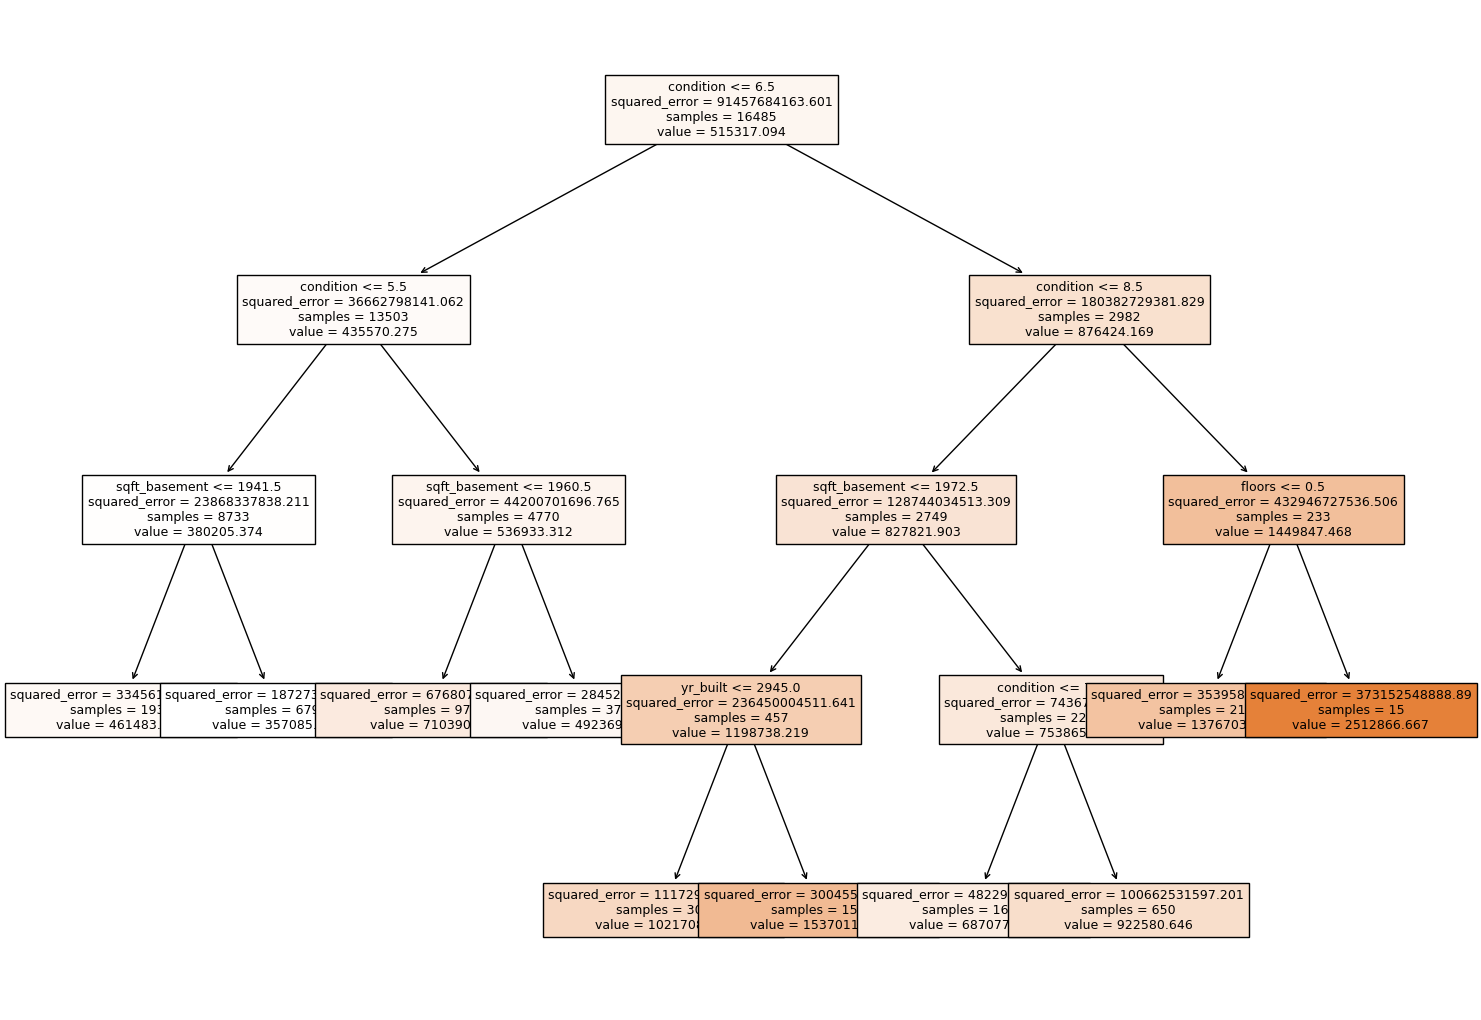

In [54]:
plt.figure(figsize=(18,13))
tree.plot_tree(dr_model,filled=True,feature_names=df.columns,fontsize=9)
plt.show()

In [55]:
dr_model.score(X_train,y_train)

0.5529083499684846

In [56]:
dr_model.score(X_test,y_test)

0.5554948425163491

<AxesSubplot:>

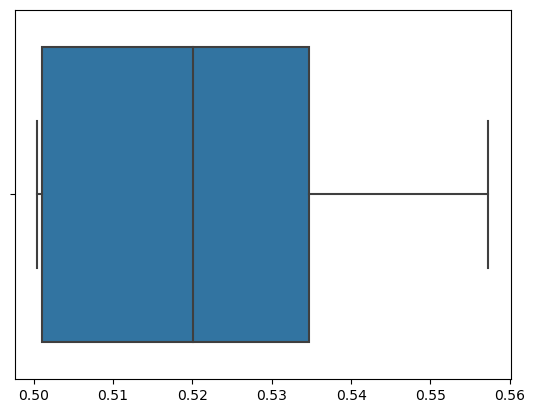

In [57]:
sns.boxplot(d_score)

# Bagging Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf=RandomForestRegressor()

In [60]:
for i in range(1,15):
    r_score=cross_val_score(RandomForestRegressor(n_estimators=i,random_state=42),scaled_X,y,cv=kf,scoring='r2')
    print(np.mean(r_score))

0.4124889132935743
0.5587164501156126
0.6100936039870972
0.6299985514635873
0.6525489796207875
0.6553047102793557
0.6733617085550755
0.6722878453777712
0.6744515416717421
0.681380887497642
0.6822670111476985
0.688774833551453
0.686001946773326
0.689088543168407


In [61]:
rm_model=RandomForestRegressor(max_depth=13, min_samples_split=5, random_state=2, max_leaf_nodes=10)
for train_data, test_data in kf.split(df):
    train,test=df.iloc[train_data],df.iloc[test_data]
    X_train=train.drop(columns=['price'],axis=1)
    y_train=train['price']
    X_test=test.drop(columns=['price'])
    y_test=test['price']
    rm_model.fit(X_train,y_train)
    y_pred = rm_model.predict(X_test)
    print("rmse",mean_squared_error(y_test, y_pred, squared=False))
    print("r2:",r2_score(y_test,y_pred))
    print("Mae:", mean_absolute_error(y_test, y_pred))
    print()

rmse 196432.6800877029
r2: 0.5740999258169703
Mae: 138621.609702439

rmse 194110.22511471383
r2: 0.5857597138669279
Mae: 138996.65444228888

rmse 203962.491563248
r2: 0.5594657039606081
Mae: 138343.03111761677

rmse 187248.56427229557
r2: 0.5843370511209287
Mae: 133666.9913523507

rmse 209239.03752105837
r2: 0.5661578842927072
Mae: 141513.43895160835



In [62]:
print("rmse",mean_squared_error(y_test, y_pred, squared=False))
print("r2:",r2_score(y_test,y_pred))
print("Mae:", mean_absolute_error(y_test, y_pred))

rmse 209239.03752105837
r2: 0.5661578842927072
Mae: 141513.43895160835


In [63]:
rm_model.score(X_test,y_test) # prediction on x test 

0.5661578842927072

In [64]:
rm_model.score(X_train,y_train)

0.5857871491330615

<AxesSubplot:>

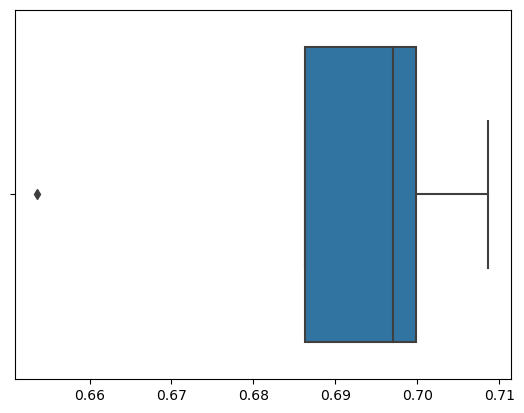

In [65]:
sns.boxplot(r_score)

In [66]:
# r2 score

# Boosting Adaboost

In [67]:
from sklearn.ensemble import AdaBoostRegressor

In [68]:
ada=AdaBoostRegressor()

In [69]:
for i in range(1,20):
    a_score=cross_val_score(AdaBoostRegressor(n_estimators=i,learning_rate=1),scaled_X,y,cv=kf,scoring='r2')
    print(np.mean(a_score))

0.5133786303689423
0.48816492260241234
0.5306221336729462
0.5398912304938688
0.4897874989646757
0.5353026425488512
0.5175452358562804
0.5014014466245833
0.5082322059462145
0.4961442799819136
0.4820693951456527
0.47617136448715824
0.4695515058264574
0.4546800460667565
0.4492784105449209
0.438787153407732
0.42283349514016033
0.40595660521858024
0.41514462267409796


In [70]:
ada_model=AdaBoostRegressor(n_estimators=6,learning_rate=0.5,random_state=2)
for train_data, test_data in kf.split(df):
    train,test=df.iloc[train_data],df.iloc[test_data]
    X_train=train.drop(columns=['price'],axis=1)
    y_train=train['price']
    X_test=test.drop(columns=['price'])
    y_test=test['price']
    ada_model.fit(X_train,y_train)
    y_pred =ada_model.predict(X_test)
    print("rmse",mean_squared_error(y_test, y_pred, squared=False))
    print("r2:",r2_score(y_test,y_pred))
    print("Mae:", mean_absolute_error(y_test, y_pred))
    print()

rmse 203878.0267717046
r2: 0.5194093015831207
Mae: 146616.40264714052

rmse 208833.21175973417
r2: 0.5446139973954556
Mae: 144588.1298750881

rmse 205532.45303045373
r2: 0.5200627371715123
Mae: 143282.23355365597

rmse 203505.6384916715
r2: 0.5620197070649642
Mae: 146948.11214476838

rmse 199077.39574588885
r2: 0.5893713242420772
Mae: 139697.64630077418



In [71]:
print("rmse",mean_squared_error(y_test, y_pred, squared=False))
print("r2:",r2_score(y_test,y_pred))
print("Mae:", mean_absolute_error(y_test, y_pred))

rmse 199077.39574588885
r2: 0.5893713242420772
Mae: 139697.64630077418


In [72]:
model = AdaBoostRegressor(learning_rate=0.5, n_estimators=6,random_state=2)

model.fit(X,y)

AdaBoostRegressor(learning_rate=0.5, n_estimators=6, random_state=2)

In [77]:
model.score(X_test,y_test)

0.5736418270451524

In [76]:
model.score(X_train,y_train)

0.557248430411958

In [79]:
# model.r2_score(y_test,y_pred)

<AxesSubplot:>

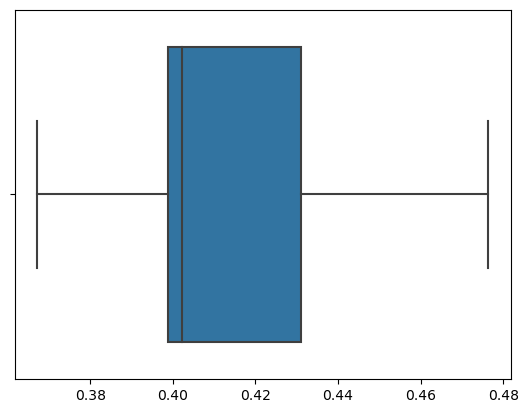

In [80]:
sns.boxplot(a_score)

In [ ]:
#model.predict(xtest)
#model.r2score(ytest,ypred) =======model.score(xtest,ytest)

# Stacking

In [81]:
from sklearn .neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [82]:
level1=[]
level1.append(("lr",lr_model))
level1.append(("knn",KNeighborsRegressor()))
level1.append(("svr",SVR()))
level1.append(("dt",dr_model))
level1.append(("rnd",rm_model))
level2=LinearRegression() 
stack_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [83]:
level1

[('lr', LinearRegression(n_jobs=-1)),
 ('knn', KNeighborsRegressor()),
 ('svr', SVR()),
 ('dt',
  DecisionTreeRegressor(max_depth=6, max_leaf_nodes=10, min_samples_split=5,
                        random_state=0)),
 ('rnd',
  RandomForestRegressor(max_depth=13, max_leaf_nodes=10, min_samples_split=5,
                        random_state=2))]

In [84]:
score=cross_val_score(stack_model,scaled_X,y,scoring="r2",cv=kf)
print(np.mean(score))
print(score)

0.6700903420448185
[0.6672614  0.67664421 0.66772532 0.68457683 0.65424394]


Based on the score on the testing data , found that Random Forest in the best model.